In [2]:

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiclass-diabetes-dataset/Multiclass Diabetes Dataset/Multiclass Diabetes Dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/multiclass-diabetes-dataset/Multiclass Diabetes Dataset/Multiclass Diabetes Dataset.csv')

df.isnull().sum()


Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


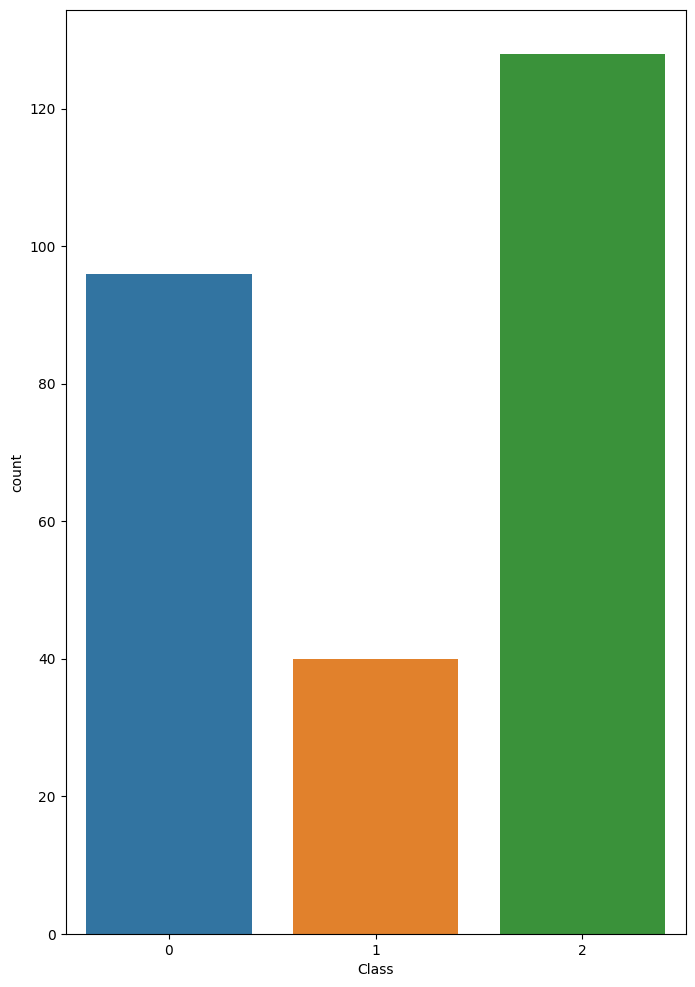

In [19]:

X = df.drop(columns = ['Class'])
y = df['Class']

plt.figure(figsize = (8,12))

sns.countplot(x = y, data = df)
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      1.00      1.00         8
           2       0.96      1.00      0.98        25

    accuracy                           0.98        53
   macro avg       0.99      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53



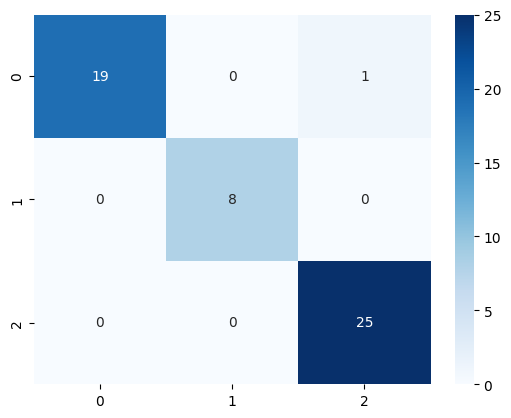

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.2)

random_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)

sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues')

plt.show()

In [27]:
num_instances = df.shape[0]

print(f"Number of Instances : {num_instances} ")

Number of Instances : 264 


Due to the small amount of Instances and the great performance of our Random Forest Model, there's no need for MLP model